## Setup
This project requires Python 3.7 or above: 🤞

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [5]:
import ipywidgets as widgets

# Polynomial Kernel

#### By using a 3rd degree polynomial kernel, this code trains an SVM classifier. He is represented on the left. On the right, we have other SVM classifiers. If your model is overfitting it is necessary to reduce its polynomial degree. On the other hand, if you are underadjusting, one must try to increase it. The coef0 hyperparameter controls how much the model is influenced by high-degree versus low-degree polynomials.

## Let’s test it on the moons dataset

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [7]:
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [8]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

In [9]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
save_fig("moons_polynomial_svc_plot")
plt.show()    

<Figure size 432x288 with 0 Axes>

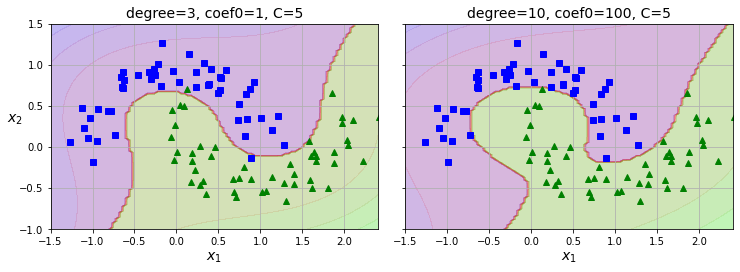

In [10]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

### Interactive tuning between degree, C and coef0 hipérparameters with Polynomial Kernel

In [11]:
def scv_poly(degree=1, C=1, coef0=10):
    
    poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=degree, coef0=coef0, C=C))
    poly100_kernel_svm_clf.fit(X, y)

    
    plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
    plt.title(f"degree={degree}, "
          f"C={C}, "
          f"coef0={coef0}")
    plt.ylabel("")
    plt.show()

In [12]:
widgets.interact(scv_poly, degree=(1,10,1), C=(1,10,2), coef0=(-10, 100, 10));

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), IntSlider(value=1, description=…

## Gaussian RBF Kernel

#### The plots show models trained with different values ​​of the gamma hyperparameters (γ) and C. Increasing gamma will narrow the bell-shaped curve and as a result each instance's radius of influence will be smaller: fiddling around individual instances makes the decision boundary more jagged. On the other hand, a small gamma value makes the bell-shaped curve wider, so that the instances have a greater radius of influence and the decision limit becomes more soft. Then γ acts as a regularization hyperparameter: if your model is overfit you must reduce it, and if it is underfit you must increase it (like the hyperparameter C).

In [13]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

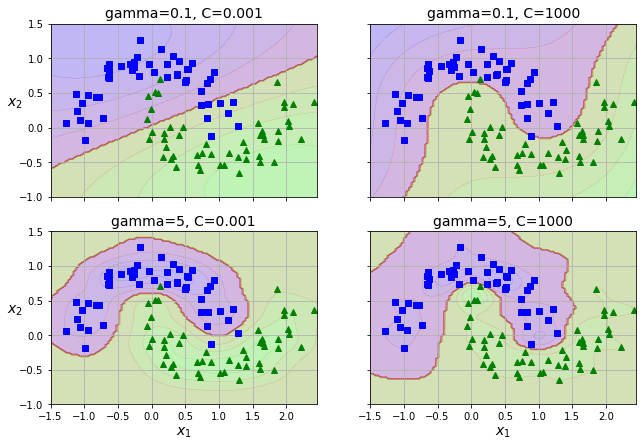

In [14]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

### Interactive tuning between  C and gamma hipérparameters with RBF Kernel

In [15]:
def scv_rbf(gamma, C):
    
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C))
    rbf_kernel_svm_clf.fit(X, y)

    
    plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    plt.title(f"gamma={gamma}, C={C}")
    plt.show()

In [16]:
widgets.interact(scv_rbf, gamma=(0.1,11,1), C=(0.001,1100,100));

interactive(children=(FloatSlider(value=5.1, description='gamma', max=11.0, min=0.1, step=1.0), FloatSlider(va…

## SVM Regression

#### The SVM algorithm is quite versatile: it not only supports linear and non-linear classification, but also Linear and non-linear Regression. the trick is to reverse the goal: instead of trying to fill the widest possible gap between two classes, limiting margin violations, SVM Regression tries to fill in as many possible number of on-path instances limiting margin violations (i.e. off-path instances). The width of the road is controlled by a hyperparameter ϵ (epsilon).

In [17]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X_ = 2 * np.random.rand(50, 1)
y_ = 4 + 3 * X_[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X_, y_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

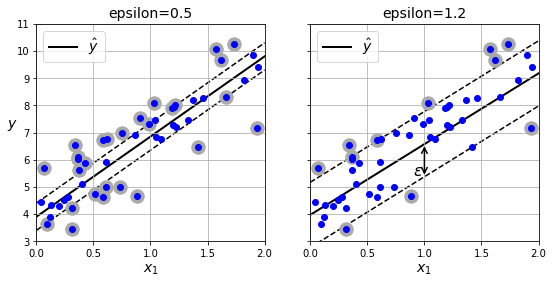

In [18]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, random_state=42))
svm_reg2.fit(X_, y_)

svm_reg._support = find_support_vectors(svm_reg, X_, y_)
svm_reg2._support = find_support_vectors(svm_reg2, X_, y_)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X_, y_, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X_, y_, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
plt.show()   

In [19]:
from sklearn.svm import SVR

np.random.seed(42)
X_ = 2 * np.random.rand(50, 1) - 1
y_ = 0.2 + 0.1 * X_[:, 0] + 0.5 * X_[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X_, y_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

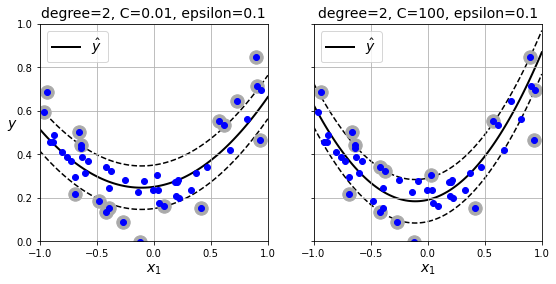

In [20]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X_, y_)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X_, y_)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X_, y_)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X_, y_, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X_, y_, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

### Interactive tuning between degree, C and epsilon hipérparameters with SVM Regression

In [21]:
def svm_poly_reg3(degree=1, C=0.01, epsilon=.1):
    
    svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=degree, C=C, epsilon=epsilon))
    svm_poly_reg2.fit(X_, y_)

    svm_poly_reg._support = find_support_vectors(svm_poly_reg, X_, y_)
    svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X_, y_)

    fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
    plt.sca(axes[0])
    plot_svm_regression(svm_poly_reg, X_, y_, [-1, 1, 0, 1])
    plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
    plt.ylabel("$y$", rotation=0)
    plt.grid()
    
    plt.sca(axes[1])
    plot_svm_regression(svm_poly_reg2, X_, y_, [-1, 1, 0, 1])
    plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
    plt.grid()
    save_fig("svm_with_polynomial_kernel_plot")
    plt.show()

In [22]:
widgets.interact(svm_poly_reg3, degree=(1,10,1), C=(.01, 500, 100), epsilon=(.0,.4,.1));

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), FloatSlider(value=0.01, descrip…